In [1]:
import tensortools as tt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# ground truth model
N, R = 20, 3
factors = [np.maximum(0, np.random.randn(N, R)) for _ in range(3)]


# noisy data
data = np.einsum('ir,jr,kr->ijk', *factors) # low-rank part
data += 0.1*np.random.randn(*data.shape) # add noise
data[data < 0] = 0.0

In [3]:
als_results = tt.cp_batch_fit(data, range(1,9), nonneg=True, replicates=10, tol=1e-6)
als_factors = als_results[R]['factors'][0]
als_factors = tt.align_factors(als_factors, factors)[0]

Optimizing rank-1 models.
   10/10 converged, min error = 0.6858, max error = 0.6858, mean error = 0.6858
Optimizing rank-2 models.
   10/10 converged, min error = 0.3642, max error = 0.3642, mean error = 0.3642
Optimizing rank-3 models.
   10/10 converged, min error = 0.1115, max error = 0.1115, mean error = 0.1115
Optimizing rank-4 models.
   10/10 converged, min error = 0.1101, max error = 0.1110, mean error = 0.1103
Optimizing rank-5 models.
   10/10 converged, min error = 0.1080, max error = 0.1104, mean error = 0.1095
Optimizing rank-6 models.
   10/10 converged, min error = 0.1033, max error = 0.1100, mean error = 0.1081
Optimizing rank-7 models.
   10/10 converged, min error = 0.1027, max error = 0.1088, mean error = 0.1068
Optimizing rank-8 models.
   10/10 converged, min error = 0.1028, max error = 0.1080, mean error = 0.1062


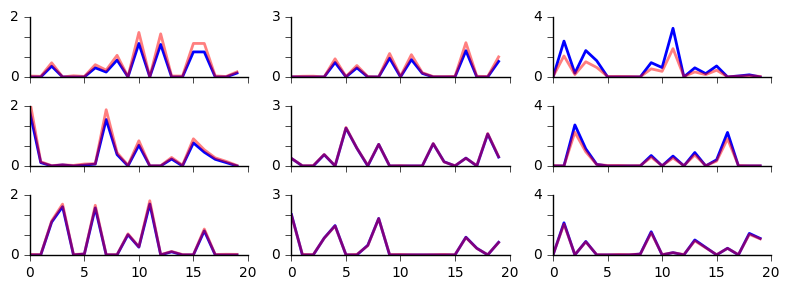

In [4]:
fig, axes = tt.plot_factors(factors, line_kw=dict(color='b', lw=2))
tt.plot_factors(als_factors, line_kw=dict(color='r', lw=2, alpha=0.5), fig=fig);

(<matplotlib.figure.Figure at 0x111d2b9b0>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x111d557b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1124b99e8>], dtype=object))

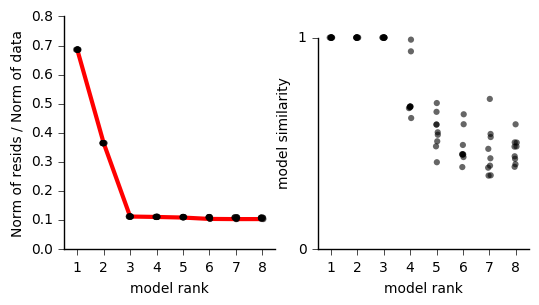

In [5]:
tt.plot_scree(als_results)